<a href="https://colab.research.google.com/github/nepalprabin/deeplearning-tensorflow/blob/master/Convoluiton_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.0.0.alpha0

/bin/bash: line 0: fg: no job control
Uninstalling tensorflow-2.2.0rc2:
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 332.1MB 52kB/s 
     |████████████████████████████████| 3.0MB 37.0MB/s 
     |████████████████████████████████| 419kB 37.6MB/s 


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

'2.0.0-alpha0'

In [3]:
#Loading dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
#Normalizing data
X_train = X_train/255.0
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test = X_test / 255.0
X_test.shape

(10000, 32, 32, 3)

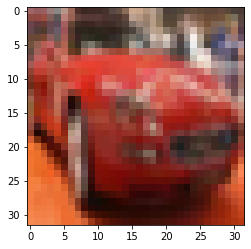

In [6]:
plt.imshow(X_train[5])

In [0]:
#Building CNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
#Flattening
model.add(tf.keras.layers.Flatten())

#Fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [12]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 27s 547us/sample - loss: 1.3423 - sparse_categorical_accuracy: 0.5181
Epoch 2/5
50000/50000 [==============================] - 22s 436us/sample - loss: 0.9227 - sparse_categorical_accuracy: 0.6748
Epoch 3/5
50000/50000 [==============================] - 22s 433us/sample - loss: 0.7545 - sparse_categorical_accuracy: 0.7343
Epoch 4/5
50000/50000 [==============================] - 22s 447us/sample - loss: 0.6301 - sparse_categorical_accuracy: 0.7781
Epoch 5/5
50000/50000 [==============================] - 22s 434us/sample - loss: 0.5279 - sparse_categorical_accuracy: 0.8141


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 184us/sample - loss: 0.7678 - sparse_categorical_accuracy: 0.7405


In [14]:
print("Accuracy: {}".format(test_accuracy))

Accuracy: 0.7404999732971191
